<a href="https://colab.research.google.com/github/plmllab/linear-algebra-and-learning-from-data/blob/main/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

**Principal Component Analysis (PCA)** is a widely used algorithm for **dimensionality reduction**. It constructs a lower-dimensional representation of a dataset while preserving as much of the original information as possible. As we will see, "keeping as much information as possible" essentially means finding directions—called **principal components**—along which the **greatest variance** is captured.


The main objective of PCA can be succinctly summarized as follows:
> **Find the projections of $n$ sample data points $\mathbf{x}_i \in \mathbb{R}^d$ onto a lower-dimensional subspace while keeping as much information as possible.**

Keeping as much information as possible is rather vague. How do we quantify the amount of information retained in the lower-dimensional projections? As we will later see, in PCA, information is specifically quantified by data's variance.

# 1. Goal of This Computational Essay

In this computational essay, our aim is to implement PCA on the MNIST dataset. MNIST is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images, and for our purposes, we are going to deal with only two digits, 0 and 1.

# 2. Import Dataset

In [1]:
import keras
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 3. Prepare Dataset

In [3]:
x_train_ones = x_train[y_train == 1]
x_train_zeros = x_train[y_train == 0]

In [4]:
x_train_ones_flattened = x_train_ones.reshape(-1, 28*28)
x_train_zeros_flattened = x_train_zeros.reshape(-1, 28*28)

In [5]:
x_train_ones_flattened.shape

(6742, 784)

In [6]:
x_train_zeros_flattened.shape

(5923, 784)

# 3. Data Matrix

For PCA, we consider a data set of observations, which is essentially $n\times d$ data matrix $\mathbf{X}$. Each data point is represented as a $d$-dimensional vector.

So, we form a data matrix $\mathbf{X}$:

In [7]:
X = np.concatenate((x_train_ones_flattened, x_train_zeros_flattened), axis=0)

We inspect the size of our data matrix $\mathbf{X}$:

In [8]:
X.shape

(12665, 784)

The size of our data matrix is $12665\times 784$.

# 4. Sample Covariance Matrix

A very important matrix in PCA is the covariance matrix of size $d\times d$ containing the covariances between the $d$ variables or features of our dataset.

It can be shown that the sample covariance matrix is:

$$S=\frac{1}{n}\mathbf{X}_c^\top\mathbf{X}_c$$

where $\mathbf{X}_c$ is a centered version (mean zero) of our data matrix.

## 4.1 Centered Data Matrix





Firstly, given $n$ data points $\mathbf{x}_i\in\mathbb{R}^d$, we compute the sample mean vector $\bar{\mathbf{x}}\in\mathbb{R}^d$.

In [9]:
X_mean = np.mean(X, axis=1, keepdims=True)

In [10]:
X_mean.shape

(12665, 1)

Then, we can compute the centered data matrix $\mathbf{X}_c$ by subtracting the mean vector from each column.

In [11]:
X_c = X - X_mean

In [12]:
X_c.shape

(12665, 784)

In [13]:
X_c_mean = np.mean(X_c, axis=1, keepdims=True)

In [14]:
X_c_mean

array([[ 2.03012210e-15],
       [ 3.48020932e-15],
       [-1.45008722e-16],
       ...,
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-4.06024420e-15]])

## 4.2 Covariance Matrix

Now, we can compute the sample covariance matrix using the centered data matrix.

In [15]:
S = X_c.T @ X_c / X_c.shape[0]

# 5. Eigendecomposition of the Covariance Matrix

In [16]:
type(np.linalg.eig(S))

numpy.linalg._linalg.EigResult

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(S)

In [18]:
perm = np.argsort(eigenvalues)[::-1]

In [19]:
eigenvalues = eigenvalues[perm]
eigenvectors = eigenvectors[:, perm]

## 6. Choose $k$, dimension of the projected subspace

## 6.1 Scree Plot

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


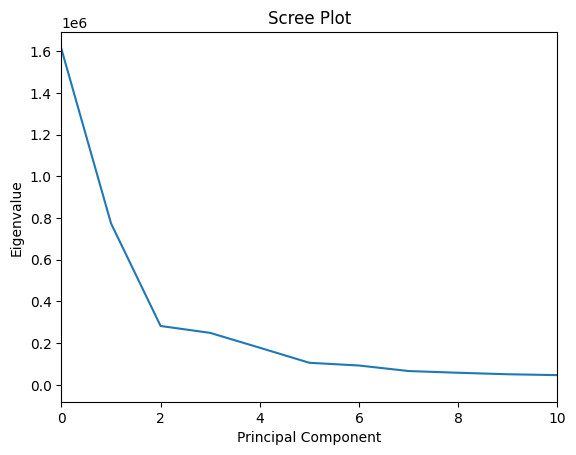

In [20]:
plt.plot(eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xlim(0, 10)
plt.title('Scree Plot')
plt.show()

From this scree plot, we can  see that the **effective rank** of our data matrix is $2$ or $5$ if we allow for little more approximation error. So, we will choose $k=2$.

# 7. Principal Components

Since we have chosen $k=2$, we can form the projection matrix $P_2=[\mathbf{u}_1,\mathbf{u}_2]$ where $\mathbf{u}_1$ and $\mathbf{u}_2$ correspond to the two laragest eigenvalues of the sample covariance matrix $S$.

In [21]:
P_2 = eigenvectors[:,:2]

In [22]:
P_2.shape

(784, 2)

# 8. Lower-Dimensional Representation of the Data

We can produce the lower dimensional representation by matrix-multiplying our projection matrix times our data matrix.

In [23]:
Z = P_2.T @ X_c.T

In [24]:
Z.shape

(2, 12665)

In [25]:
x_zeros_1 = Z[0, :6742]
x_zeros_2 = Z[1, :6742]

In [26]:
x_ones_1 = Z[0, 6742:]
x_ones_2 = Z[1, 6742:]

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


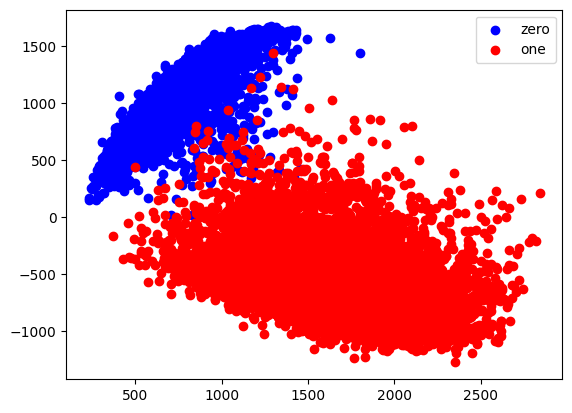

In [27]:
plt.scatter(x_zeros_1, x_zeros_2, color='blue', label='zero')
plt.scatter(x_ones_1, x_ones_2, color='red', label='one')
plt.legend()
plt.show()

# 9. PCA with SVD

Instead of eigendecomposing the sample covariance matrix $S$ to perform PCA on our data, we could singular value decompose our data matrix $\mathbf{X}$ itself to obtain the principal components.

In [28]:
U, S, Vh = np.linalg.svd(X_c)

In [34]:
P_2 = Vh.T[:, :2]

In [35]:
P_2.shape

(784, 2)

In [36]:
Z = P_2.T @ X_c.T

In [37]:
x_zeros_1 = Z[0, :6742]
x_zeros_2 = Z[1, :6742]

In [38]:
x_ones_1 = Z[0, 6742:]
x_ones_2 = Z[1, 6742:]

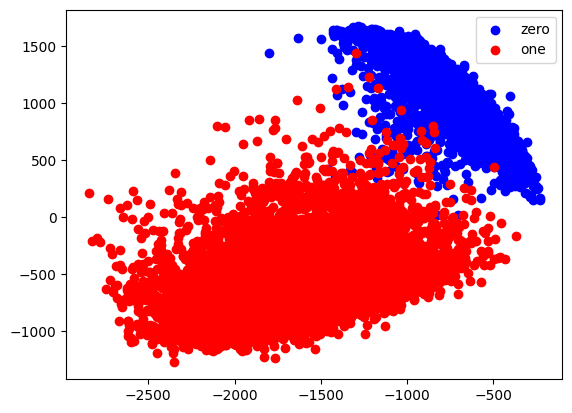

In [39]:
plt.scatter(x_zeros_1, x_zeros_2, color='blue', label='zero')
plt.scatter(x_ones_1, x_ones_2, color='red', label='one')
plt.legend()
plt.show()

# 10. PCA using Sci-kit Learn

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_c)

In [47]:
P_2 = pca.components_.T

In [48]:
Z = P_2.T @ X_c.T

In [50]:
x_zeros_1 = Z[0, :6742]
x_zeros_2 = Z[1, :6742]

In [51]:
x_ones_1 = Z[0, 6742:]
x_ones_2 = Z[1, 6742:]

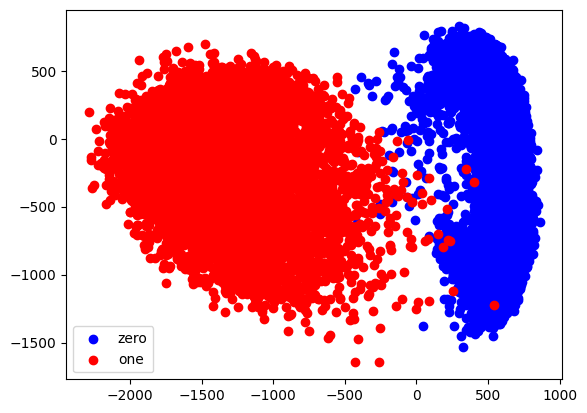

In [52]:
plt.scatter(x_zeros_1, x_zeros_2, color='blue', label='zero')
plt.scatter(x_ones_1, x_ones_2, color='red', label='one')
plt.legend()
plt.show()

# Questions

Why do the three implementations yield different results?